In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Loading the data:



Metdata Lifeline cluster:
/groups/umcg-lifelines/prm02/projects/ov22_0666/dataset_order_202403/
-> Need to be copy to our own local directory for processing!
We copied all the files into our group directory:
/groups/umcg-lifelines/tmp01/projects/ov22_0666/metadata_copy/dataset_order_202403/dataset_order_202403

Blood Metabolome omic:
/groups/umcg-lifelines/rsc01/releases/deep_nmr_data/v1/data/LLD_bloodlipids_nmr.txt.gz

Data directory: 
/groups/umcg-lifelines/prm03/releases

We proccessed DEEP data ourown (Tal), files are in the cluster under:
/groups/umcg-lifelines/tmp01/projects/ov22_0666/personal_directories/talbamberger/data/feature_tables

Linkage file to connect metadata sample id with microbiome sample ids:

/groups/umcg-lifelines/tmp01/projects/ov22_0666/personal_directories/talbamberger/metadata/OV22_00666_deep_linkage_file-v2.csv”

In [2]:
# Mapping different pids:
linkage_mgs = pd.read_csv("/groups/umcg-lifelines/tmp01/projects/ov22_0666/personal_directories/talbamberger/data/linkage_file_MGS.txt", header=None, sep=" ")
linkage_mgs.columns = ['LLDEEP_ID', 'sample_alias']
linkage_mgs['sample_alias'] = linkage_mgs['sample_alias'].str.replace('LL', '', regex=False)

linkage_ega = pd.read_csv("/groups/umcg-lifelines/tmp01/projects/ov22_0666/personal_directories/talbamberger/data/feature_tables/EGA-metadata/sample_file.tsv", sep="\t")
linkage_ega['sample_alias'] = linkage_ega['sample_alias'].str.replace('LL', '', regex=False)

pids_mapping = pd.merge(linkage_mgs, linkage_ega, on="sample_alias", how="inner")

In [3]:
taxonomy_deep_path = '/groups/umcg-lifelines/tmp01/projects/ov22_0666/personal_directories/talbamberger/data/feature_tables/kraken_species_level_taxonomy.tsv'
taxonomy_deep = pd.read_csv(taxonomy_deep_path, sep='\t')

taxonomy_deep = taxonomy_deep.drop(columns=['9002000001328080LL'])

taxonomy_deep = taxonomy_deep.set_index('Taxon').T

taxonomy_deep = taxonomy_deep.reset_index(names='sample')

taxonomy_deep = pd.merge(pids_mapping[["LLDEEP_ID", "file_accession_id"]], taxonomy_deep, 
                         left_on = "file_accession_id", right_on="sample", how="inner").drop(
    columns=['file_accession_id', 'sample']).set_index('LLDEEP_ID')


In [4]:
taxonomy_deep.head()

,JADJOV01 sp016713585,Odoribacter sp905193145,Deinococcus sp000745175,Evtepia sp004551945,Corynebacterium durum,An92 sp009935845,Stercoripulliclostridium_A merdigallinarum,F23-B02 sp900556535,UBA7185 sp900556545,Oxalobacter sp905202055,...,Vibrio sp001874155,Streptosporangium roseum,Bog-1183 sp003136635,Novosphingobium lentum,SOJA01 sp014859805,Bacillus_A cereus,Mycobacterium sp903884065,BMS3BBIN02 sp013151445,Prochlorococcus_A sp003212755,GRL18 sp016097415
LLDEEP_ID,,,,,,,,,,,,,,,,,,,,,
LLDeep_0001,0,71,0,37,108,56,14,638,163,0,...,0,0,0,0,0,0,0,0,0,0
LLDeep_0002,29,0,0,0,1203,0,10,0,59,13,...,0,0,0,0,0,0,0,0,0,0
LLDeep_0006,0,189,0,725,291,79,34,49,30,31,...,0,0,0,0,0,0,0,0,0,0
LLDeep_0007,0,520,0,22,214,18,18,63,37,0,...,0,0,0,0,0,0,0,0,0,0
LLDeep_0010,0,318,0,33233,604,75,15,102,67,15,...,0,0,0,0,0,0,0,0,0,0


In [5]:
taxonomy_deep.shape

(1097, 52648)

In [ ]:
# TODO: Rarefied, calculate RA and filter.

### Load blood metabolites:

In [2]:
readme_blood_metabolites_path = '/groups/umcg-lifelines/rsc01/releases/deep_nmr_data/v1/README_deep_nmr_data.txt'
with open(readme_blood_metabolites_path, "r") as f:
    print(f.read())

# README
# ==========================
# GENERAL INFO
# ==========================
Name of release folder: /groups/umcg-lifelines/prm03/releases/deep_nmr_data
Study title: Metabolomics in Lifelines-DEEP 
Created by: Jingyuan Fu
Created on: 31-03-2020
Updated by: Dasha Zhernakova
Updated on: 07-08-2023
Contact at: j.fu@umcg.nl / dashazhernakova@gmail.com
Principal Investigator: Jingyuan Fu (j.fu@umcg.nl)
Sample count: 1491

# =========================
SUMMARY OF RESEARCH
# =========================

A wide range of plasma metabolites using nuclear magnetic resonance (NMR) and Nightingale Biomarker Analysis Platform.
This platform provides measures of 231 plasma metabolome traits, including total lipid concentrations and relative compositions of 14 lipoprotein subclasses, lipoprotein particle sizes, apolipoproteins, cholesterol, glycerides and phospholipid concentrations, various glycolysis components, fatty acid composition, inflammation, fluid balance, ketone bodies, and AAs.
Reference:

Blood metabolites data description can be found in this article: 
https://pubmed.ncbi.nlm.nih.gov/30971183/

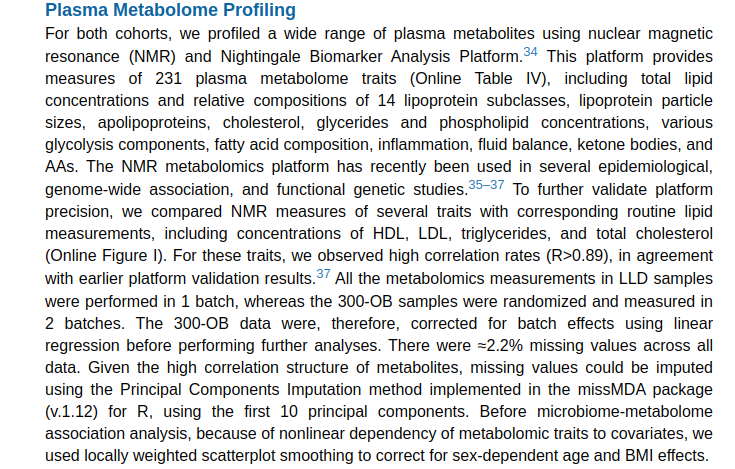

**Note**: 
* They suggest to impute missing values using Prinical Components imputation (missMDA package in R) using the first 10 pricinpal component.
* They suggest to correct for sex-dependent age ang BMI effects using locally weighted scatterplot smoothing.

*Which preprocess they did to the data?*

It seems like it's the raw NMR data. But I'm looking deeper into the article to see wether they preform normalization and which

-> It wasn't clear from the article nor from the supplementay data


In [5]:
import gzip

blood_metabolites_names_path = '/groups/umcg-lifelines/rsc01/releases/deep_nmr_data/v1/data/NMR_lipid_names.txt.gz'
with gzip.open(blood_metabolites_names_path, 'rb') as f:
    blood_metabolites_names = pd.read_csv(f, sep='\t')
blood_metabolites_names = blood_metabolites_names.set_index('Metabolite').squeeze()

In [20]:
blood_metabolites_names.head()

,Metabolite full name
Metabolite,
S.VLDL.C,Total cholesterol in small VLDL (mmol/l)
ApoB.ApoA1,Ratio of apolipoprotein B to apolipoprotein A-I
VLDL.C,Total cholesterol in VLDL (mmol/l)
S.VLDL.FC,Free cholesterol in small VLDL (mmol/l)
XXL.VLDL.CE,Cholesterol esters in chylomicrons and extreme...


In [7]:

blood_metabolites_path =  '/groups/umcg-lifelines/rsc01/releases/deep_nmr_data/v1/data/LLD_bloodlipids_nmr.txt.gz'

with gzip.open(blood_metabolites_path, 'rb') as f:
    blood_metabolites = pd.read_csv(f, sep='\t')

In [9]:
blood_metabolites = blood_metabolites.set_index('id').rename({'id':'LLDEEP_ID'})

In [10]:
blood_metabolites.head()

,XXL.VLDL.P,XXL.VLDL.L,XXL.VLDL.PL,XXL.VLDL.C,XXL.VLDL.CE,XXL.VLDL.FC,XXL.VLDL.TG,XL.VLDL.P,XL.VLDL.L,XL.VLDL.PL,...,Leu,Val,Phe,Tyr,Ace,AcAce,bOHBut,Crea,Alb,Gp
id,,,,,,,,,,,,,,,,,,,,,
LLDeep_0001,2.450000e-11,0.00528,0.000636,0.00109,0.000688,0.000397,0.00356,0.000000e+00,0.0000,0.00000,...,0.0641,0.215,0.0350,0.0524,0.0759,0.0392,0.1510,0.0574,0.0878,1.06
LLDeep_0002,1.570000e-10,0.03360,0.003910,0.00582,0.003270,0.002550,0.02390,8.120000e-10,0.0797,0.01190,...,0.0713,0.171,0.0434,0.0641,0.0502,0.0356,0.0525,0.0801,0.0901,1.22
LLDeep_0004,7.330000e-11,0.01590,0.001820,0.00360,0.002360,0.001240,0.01050,3.950000e-10,0.0396,0.00583,...,0.0755,0.184,0.0392,0.0397,0.0814,0.0482,0.0635,0.0822,0.0906,1.07
LLDeep_0005,8.570000e-11,0.01810,0.002250,0.00231,0.001010,0.001300,0.01350,4.200000e-10,0.0405,0.00519,...,0.0708,0.173,0.0338,0.0616,0.0555,0.0380,0.0711,0.0706,0.0901,1.09
LLDeep_0006,1.690000e-09,0.36000,0.044200,0.05540,0.025900,0.029500,0.26000,9.520000e-09,0.9220,0.15100,...,NaN,NaN,0.0519,0.0836,0.0615,0.1270,NaN,0.0939,0.1000,2.15


To understand better how to preprocess them / wether they have been preprocess lets visualize them, and also look for 
'Common Pre-processing for NMD data' 
As in the Microbiome-Metabolome assosiation study in Human-Mice we moostly had Mass Spectrom data, so the preprocess pipeline there was different.

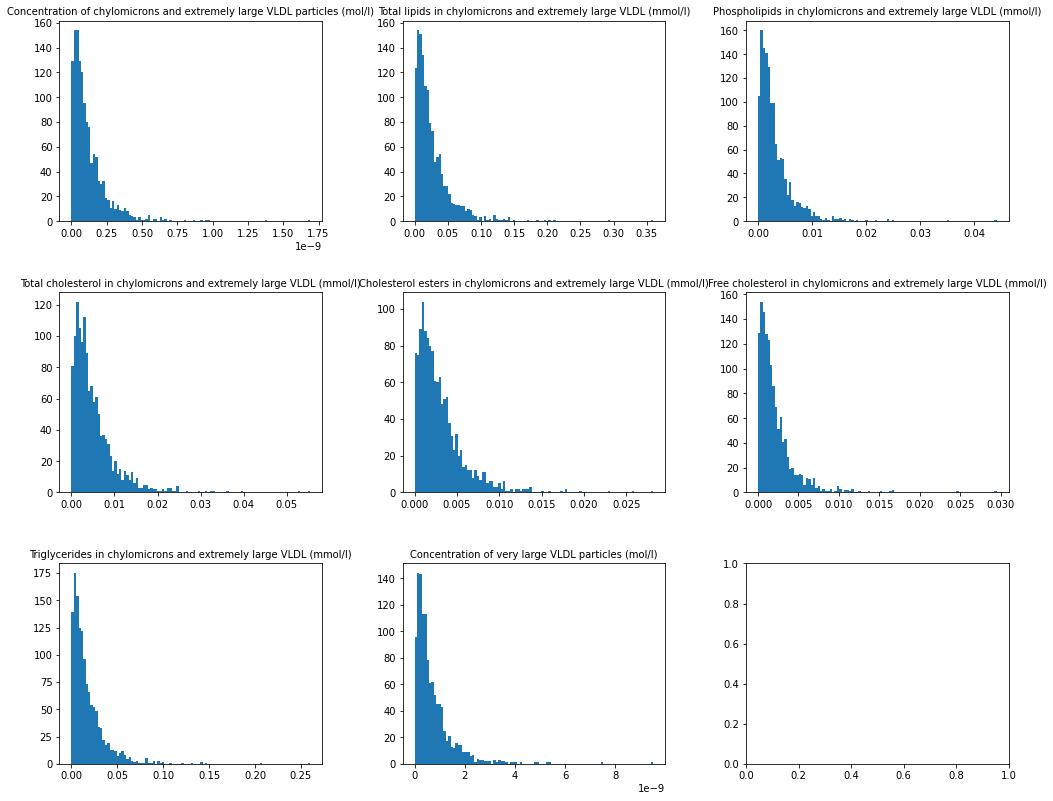

In [38]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,12))
fig.tight_layout(pad=5.0)
for i, metabolite in enumerate(blood_metabolites.columns[:8]):
    r = i//3
    c = i%3
    ax[r][c].hist(blood_metabolites[metabolite].replace(to_replace=0, value=np.nan).dropna(), bins=100)
    metabolite_full_name = blood_metabolites_names[metabolite]
    ax[r][c].set_title(metabolite_full_name)
    ax[r][c].title.set_size(10)
plt.show()

In [ ]:
# TODO: Impute missing values

In [44]:
blood_metabolites_t = blood_metabolites.replace(to_replace=0, value=np.nan).map(lambda x: np.log(x))

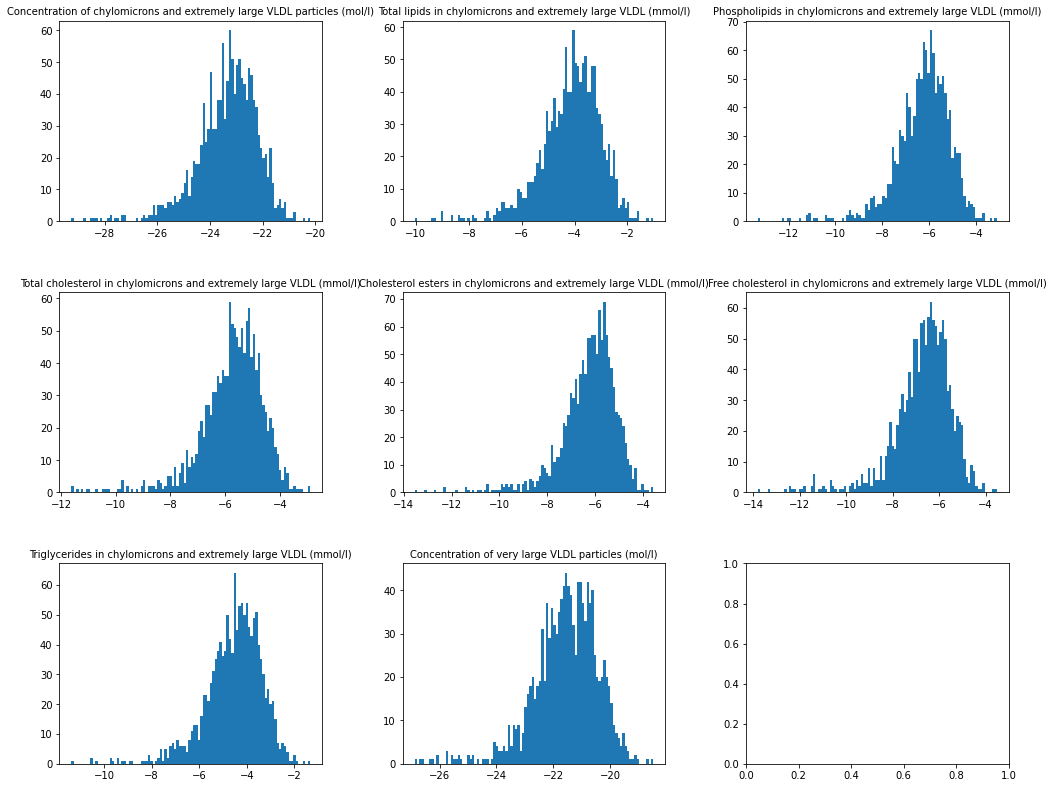

In [45]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,12))
fig.tight_layout(pad=5.0)
for i, metabolite in enumerate(blood_metabolites_t.columns[:8]):
    r = i//3
    c = i%3
    ax[r][c].hist(blood_metabolites_t[metabolite], bins=100)
    metabolite_full_name = blood_metabolites_names[metabolite]
    ax[r][c].set_title(metabolite_full_name)
    ax[r][c].title.set_size(10)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
standard_scaler = StandardScaler()
blood_metabolites_t = pd.DataFrame(standard_scaler.fit_transform(blood_metabolites_t), index=blood_metabolites_t.index, columns = blood_metabolites_t.columns)

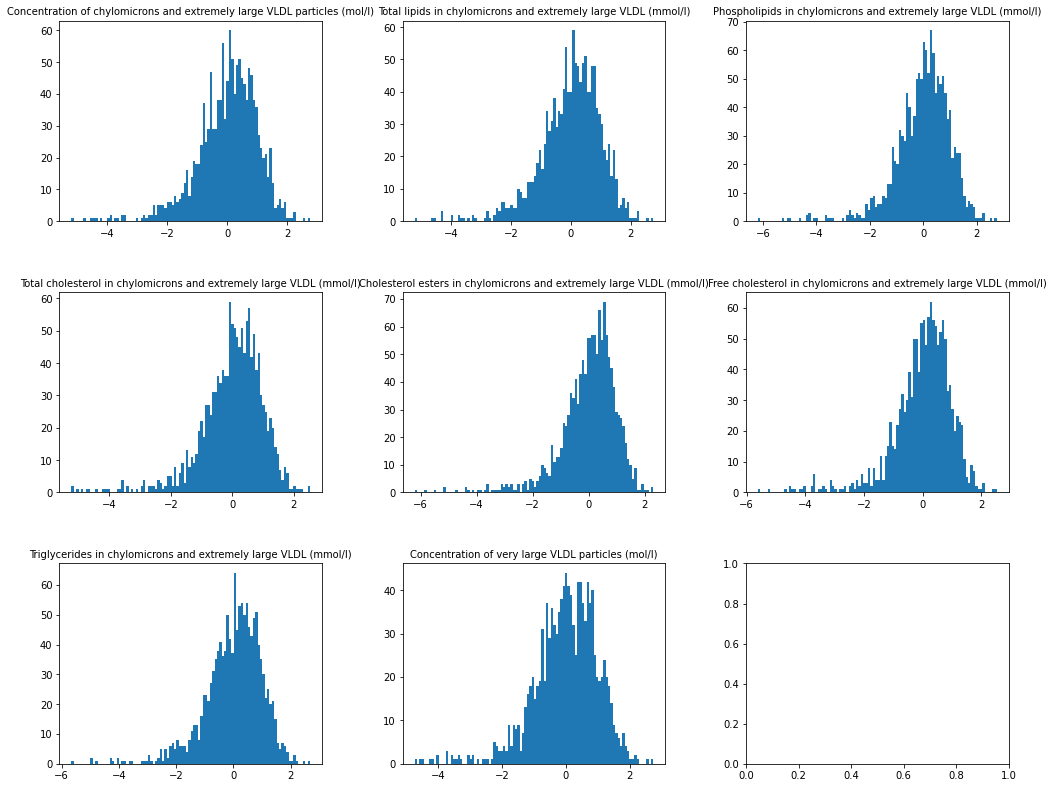

In [54]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,12))
fig.tight_layout(pad=5.0)
for i, metabolite in enumerate(blood_metabolites_t.columns[:8]):
    r = i//3
    c = i%3
    ax[r][c].hist(blood_metabolites_t[metabolite], bins=100)
    metabolite_full_name = blood_metabolites_names[metabolite]
    ax[r][c].set_title(metabolite_full_name)
    ax[r][c].title.set_size(10)
plt.show()